# Import libraries

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import io

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pickle

Read .csv file using python library

In [2]:
H1B_visa = pd.read_csv('C:\my files\Machine_learning_internship\Main_project\H-1B_Disclosure_Data_FY2019.csv',low_memory=False)

Check the no.of rows and columns in the csv file

In [3]:
H1B_visa.shape

(664616, 260)

Print the data using display option Onother hand, use .head for first five set or .tail for last five set of matrix data

In [4]:
H1B_visa.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,PW_OTHER_SOURCE_10,PW_NON-OES_YEAR_10,PW_SURVEY_PUBLISHER_10,PW_SURVEY_NAME_10,H-1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,MASTERS_EXEMPTION,PUBLIC_DISCLOSURE
0,I-200-16092-327771,WITHDRAWN,04/08/2016,04/30/2019,NaN,H-1B,ASSOCIATE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,N,N,NaN,NaN,NaN,NaN
1,I-203-17188-450729,WITHDRAWN,07/14/2017,05/13/2019,NaN,E-3 Australian,ACCOUNT SUPERVISOR (MOTHER),11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I-203-17229-572307,WITHDRAWN,08/23/2017,04/30/2019,NaN,E-3 Australian,EXECUTIVE CREATIVE DIRECTOR,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,I-203-17356-299648,WITHDRAWN,12/22/2017,08/20/2019,NaN,E-3 Australian,PROJECT MANAGEMENT LEAD,11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-203-18008-577576,WITHDRAWN,01/10/2018,04/15/2019,NaN,E-3 Australian,"CREATIVE DIRECTOR, UX",11-2011,ADVERTISING AND PROMOTIONS MANAGERS,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis 

In VISA_CLASS, First condition has focusing H1B Visa for united states of America.
So, here drop the rows which is not belongs to H1B visa.
The following command excute  and keep necessary rows.

In [5]:
H1B_visa = H1B_visa[H1B_visa.VISA_CLASS == 'H-1B']
#H1B_visa = H1B_visa[H1B_visa.EMPLOYER_COUNTRY == 'UNITED STATES OF AMERICA']
H1B_visa = H1B_visa[H1B_visa.CASE_STATUS != 'WITHDRAWN']
H1B_visa = H1B_visa[H1B_visa.CASE_STATUS != 'CERTIFIED-WITHDRAWN']


After considering, withdrawn and certified drawn. Check the shape of the dataframe

In [6]:
H1B_visa.shape

(583806, 260)

Now considering recommended features for the further EDA assessment arranging recommended columns from the above conditioned data frame.

In [7]:
select_columns = ['CASE_STATUS','VISA_CLASS','EMPLOYER_NAME','AGENT_REPRESENTING_EMPLOYER','SECONDARY_ENTITY_1','JOB_TITLE','SOC_TITLE','SOC_CODE', 'NAICS_CODE','CONTINUED_EMPLOYMENT', 'CHANGE_PREVIOUS_EMPLOYMENT','NEW_CONCURRENT_EMPLOYMENT', 'CHANGE_EMPLOYER','AMENDED_PETITION', 'H-1B_DEPENDENT', 'SUPPORT_H1B','WILLFUL_VIOLATOR','WAGE_RATE_OF_PAY_FROM_1', 'WAGE_RATE_OF_PAY_TO_1','WAGE_UNIT_OF_PAY_1','TOTAL_WORKER_POSITIONS','PREVAILING_WAGE_1']
H1B_visa = H1B_visa[select_columns]

In the below, .shape tell us that how many columns have selected out of 260 columns

In [8]:
H1B_visa.shape

(583806, 22)

Down here, Lets have a look headers and their attributes and understanding attributes of the data

In [9]:
H1B_visa.head()

,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,...,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
24,CERTIFIED,H-1B,FANTUAN GROUP INC,Y,NaN,ADVERSTING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,511210.0,0,...,0,0,N,NaN,N,33.0,NaN,Hour,1.0,NaN
26,CERTIFIED,H-1B,TPUSA-FHCS,Y,NaN,ADVERTISING AND PROMOTIONS DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,56142.0,0,...,1,0,N,NaN,N,99000.0,NaN,Year,1.0,NaN
47,CERTIFIED,H-1B,UNIVERSITY OF TEXAS AT DALLAS,N,NaN,PROGRAM MANAGER I,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,611310.0,0,...,0,0,N,NaN,N,67500.0,NaN,Year,1.0,55370.0
52,CERTIFIED,H-1B,"ZENITH MEDIA SERVICES, INC.",Y,NaN,ASSOCIATE STRATEGY DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541830.0,1,...,0,0,N,NaN,N,102000.0,NaN,Year,1.0,94806.0
54,CERTIFIED,H-1B,APPLE INC.,Y,NaN,ADVERTISING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,334111.0,0,...,0,0,N,NaN,N,97781.0,NaN,Year,50.0,97781.0


check Data types of all the features and go a head.

In [10]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583806 entries, 24 to 664615
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  583806 non-null  object 
 1   VISA_CLASS                   583806 non-null  object 
 2   EMPLOYER_NAME                583802 non-null  object 
 3   AGENT_REPRESENTING_EMPLOYER  583801 non-null  object 
 4   SECONDARY_ENTITY_1           534045 non-null  object 
 5   JOB_TITLE                    583806 non-null  object 
 6   SOC_TITLE                    583802 non-null  object 
 7   SOC_CODE                     583802 non-null  object 
 8   NAICS_CODE                   583805 non-null  float64
 9   CONTINUED_EMPLOYMENT         583806 non-null  object 
 10  CHANGE_PREVIOUS_EMPLOYMENT   583806 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT    583805 non-null  float64
 12  CHANGE_EMPLOYER              583806 non-null  int64  
 13

# Exploratory Data Analysis

# Data visualization and Data cleaning

First, go with labelled or target features with help of barplot using matlabplotlib library

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

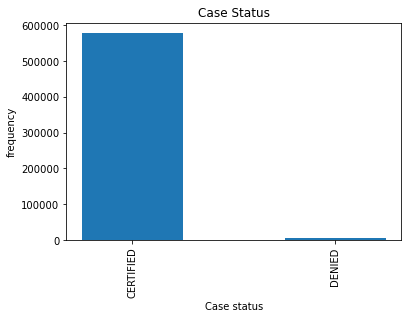

In [11]:
H1B_visa.CASE_STATUS.value_counts()
plt.bar(H1B_visa['CASE_STATUS'].value_counts().index, H1B_visa['CASE_STATUS'].value_counts(), width= 0.5, bottom=None , align='center', data=H1B_visa)
plt.title('Case Status')
plt.xlabel('Case status')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')

Now, check all features

<AxesSubplot:xlabel='JOB_TITLE'>

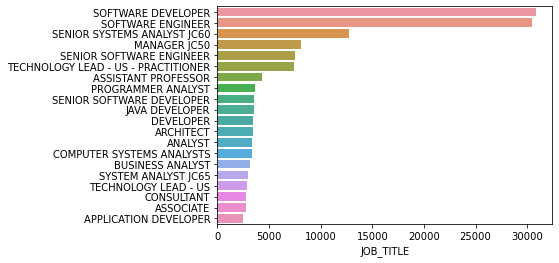

In [12]:
H1B_visa['JOB_TITLE'].value_counts()
sns.barplot(x = H1B_visa['JOB_TITLE'].value_counts()[:20], y = H1B_visa['JOB_TITLE'].value_counts().index[:20])

Job title is a categorical feature and has a large of different attributes, only top first 20 features is plotted.

(array([0, 1]), [Text(0, 0, 'Y'), Text(1, 0, 'N')])

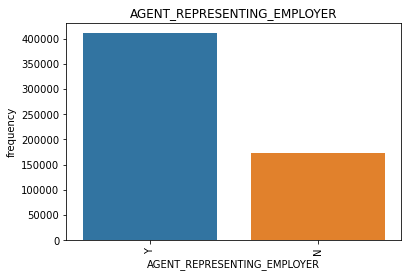

In [13]:
H1B_visa['AGENT_REPRESENTING_EMPLOYER'].value_counts()[:20]
sns.barplot(x = H1B_visa['AGENT_REPRESENTING_EMPLOYER'].value_counts().index[:20], y = H1B_visa['AGENT_REPRESENTING_EMPLOYER'].value_counts()[:20])
plt.title('AGENT_REPRESENTING_EMPLOYER')
plt.xlabel('AGENT_REPRESENTING_EMPLOYER')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')

Agent representing employer represents whether the employee is represented by agent employer or not.It has only two features y or N.

<AxesSubplot:xlabel='SOC_TITLE'>

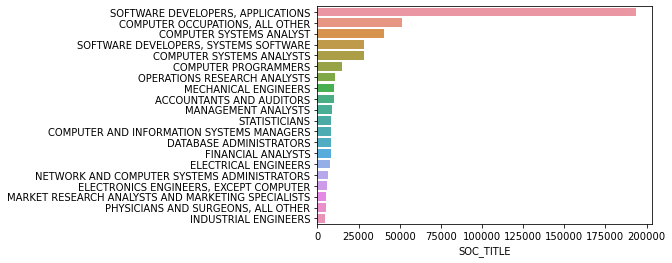

In [14]:
H1B_visa['SOC_TITLE'].value_counts()
sns.barplot(x = H1B_visa['SOC_TITLE'].value_counts()[:20], y = H1B_visa['SOC_TITLE'].value_counts().index[:20])

<AxesSubplot:xlabel='EMPLOYER_NAME'>

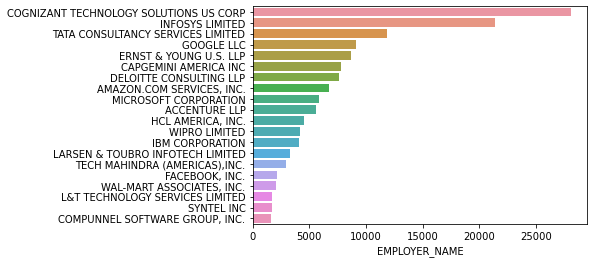

In [15]:
H1B_visa['EMPLOYER_NAME'].value_counts()
sns.barplot(x = H1B_visa['EMPLOYER_NAME'].value_counts()[:20], y = H1B_visa['EMPLOYER_NAME'].value_counts().index[:20])

Employer name is one of the important features has considered. It is also cateogorical values has large data
as different types of features and it needs to be binned.

<AxesSubplot:title={'center':'NAICS_CODE'}, ylabel='NAICS_CODE'>

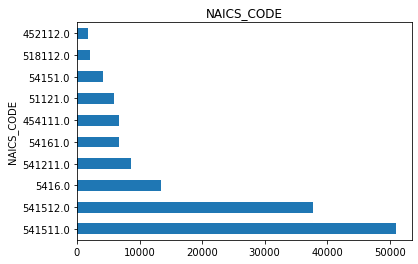

In [16]:
NAICS_CODE = H1B_visa.groupby('EMPLOYER_NAME').CASE_STATUS.count().nlargest(20).index.tolist()
NAICS_CODE_H1B_visa = H1B_visa.loc[H1B_visa.EMPLOYER_NAME.isin(NAICS_CODE)]
NAICS_CODE_H1B_visa.groupby('NAICS_CODE').EMPLOYER_NAME.count().nlargest(10).plot(kind='barh',title='NAICS_CODE')

In [17]:
H1B_visa.CONTINUED_EMPLOYMENT.value_counts()

0      439059
1      133550
5        4808
2        2552
4        1304
10       1119
3         721
01        142
25        136
8          80
20         76
15         74
6          64
12         35
50         23
30         22
40         10
18          8
001         5
B           3
35          3
02          2
13          2
7           2
99          2
17          1
21          1
45          1
11          1
Name: CONTINUED_EMPLOYMENT, dtype: int64

In [18]:
H1B_visa['H-1B_DEPENDENT'].value_counts(dropna= False)

N      365496
Y      218290
NaN        20
Name: H-1B_DEPENDENT, dtype: int64

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

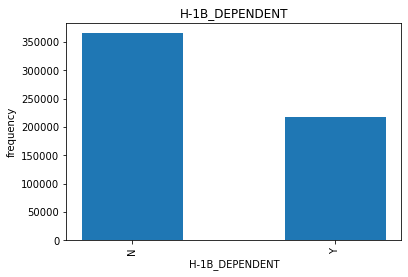

In [19]:

plt.bar(H1B_visa['H-1B_DEPENDENT'].value_counts().index, H1B_visa['H-1B_DEPENDENT'].value_counts(), width= 0.5, bottom=None , align='center', data=H1B_visa)
plt.title('H-1B_DEPENDENT')
plt.xlabel('H-1B_DEPENDENT')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')

In [20]:
H1B_visa['SUPPORT_H1B'].value_counts(dropna= False)

NaN    365278
Y      216762
N        1766
Name: SUPPORT_H1B, dtype: int64

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

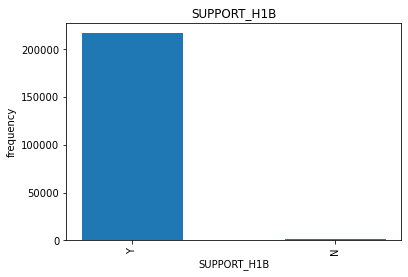

In [21]:
plt.bar(H1B_visa['SUPPORT_H1B'].value_counts().index, H1B_visa['SUPPORT_H1B'].value_counts(), width= 0.5, bottom=None , align='center', data=H1B_visa)
plt.title('SUPPORT_H1B')
plt.xlabel('SUPPORT_H1B')
plt.ylabel('frequency')
plt.xticks(rotation='vertical')

# Dealing with Missing and imputing values

check and count the null values in all features

In [22]:
H1B_visa.isnull().sum()

CASE_STATUS                         0
VISA_CLASS                          0
EMPLOYER_NAME                       4
AGENT_REPRESENTING_EMPLOYER         5
SECONDARY_ENTITY_1              49761
JOB_TITLE                           0
SOC_TITLE                           4
SOC_CODE                            4
NAICS_CODE                          1
CONTINUED_EMPLOYMENT                0
CHANGE_PREVIOUS_EMPLOYMENT          0
NEW_CONCURRENT_EMPLOYMENT           1
CHANGE_EMPLOYER                     0
AMENDED_PETITION                    0
H-1B_DEPENDENT                     20
SUPPORT_H1B                    365278
WILLFUL_VIOLATOR                   20
WAGE_RATE_OF_PAY_FROM_1             4
WAGE_RATE_OF_PAY_TO_1          285393
WAGE_UNIT_OF_PAY_1                  4
TOTAL_WORKER_POSITIONS              1
PREVAILING_WAGE_1                4681
dtype: int64

EMPLOYER_NAME, AGENT_REPRESENTING_EMPLOYER, SOC_TITLE, SOC_CODE, NAICS_CODE, NEW_CONCURRENT_EMPLOYMENT, H-1B_DEPENDENT, WILLFUL_VIOLATOR, WAGE_RATE_OF_PAY_FROM_1, WAGE_UNIT_OF_PAY_1, and TOTAL_WORKER_POSITIONS are very less missing variables.
But, It would be needed sometimes to increase the accuracy rate.

SECONDARY_ENTITY_1,SUPPORT_H1B, WAGE_RATE_OF_PAY_TO_1, and PREVAILING_WAGE_1 will be filled or replaced with mode or median and mean.

In [23]:
H1B_visa['EMPLOYER_NAME'] = H1B_visa['EMPLOYER_NAME'].fillna(H1B_visa['EMPLOYER_NAME'].mode()[0])
H1B_visa['AGENT_REPRESENTING_EMPLOYER'] = H1B_visa['AGENT_REPRESENTING_EMPLOYER'].fillna(H1B_visa['AGENT_REPRESENTING_EMPLOYER'].mode()[0])
H1B_visa['SECONDARY_ENTITY_1'] = H1B_visa['SECONDARY_ENTITY_1'].fillna(H1B_visa['SECONDARY_ENTITY_1'].mode()[0])
H1B_visa['SOC_CODE'] = H1B_visa['SOC_CODE'].fillna(H1B_visa['SOC_CODE'].mode()[0])
H1B_visa['NAICS_CODE'] = H1B_visa['NAICS_CODE'].fillna(H1B_visa['NAICS_CODE'].mode()[0])
H1B_visa['SOC_TITLE'] = H1B_visa['SOC_TITLE'].fillna(H1B_visa['SOC_TITLE'].mode()[0])
H1B_visa['H-1B_DEPENDENT'] = H1B_visa['H-1B_DEPENDENT'].fillna(H1B_visa['H-1B_DEPENDENT'].mode()[0])
H1B_visa['WILLFUL_VIOLATOR'] = H1B_visa['WILLFUL_VIOLATOR'].fillna(H1B_visa['WILLFUL_VIOLATOR'].mode()[0])
H1B_visa['NEW_CONCURRENT_EMPLOYMENT'] = H1B_visa['NEW_CONCURRENT_EMPLOYMENT'].fillna(H1B_visa['NEW_CONCURRENT_EMPLOYMENT'].mode()[0])
H1B_visa['WAGE_RATE_OF_PAY_FROM_1'] = H1B_visa['WAGE_RATE_OF_PAY_FROM_1'].fillna(H1B_visa['WAGE_RATE_OF_PAY_FROM_1'].mode()[0])
H1B_visa['WAGE_UNIT_OF_PAY_1'] = H1B_visa['WAGE_UNIT_OF_PAY_1'].fillna(H1B_visa['WAGE_UNIT_OF_PAY_1'].mode()[0])
H1B_visa['TOTAL_WORKER_POSITIONS'] = H1B_visa['TOTAL_WORKER_POSITIONS'].fillna(H1B_visa['TOTAL_WORKER_POSITIONS'].mode()[0])

In [24]:
#H1B_visa =H1B_visa.dropna(subset = ['EMPLOYER_NAME','AGENT_REPRESENTING_EMPLOYER','SOC_TITLE','SOC_CODE', 'NAICS_CODE','CONTINUED_EMPLOYMENT', 'NEW_CONCURRENT_EMPLOYMENT', 'WILLFUL_VIOLATOR','WAGE_RATE_OF_PAY_FROM_1', 'WAGE_UNIT_OF_PAY_1','TOTAL_WORKER_POSITIONS'])

<AxesSubplot:>

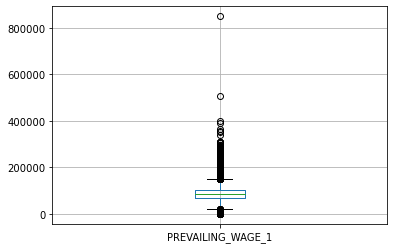

In [25]:
H1B_visa.boxplot(column='PREVAILING_WAGE_1')

For wage rate scale, wage rate of pay to 1 has outlier and applied quantile

In [26]:
q1 = H1B_visa["PREVAILING_WAGE_1"].quantile(0.2)
q3 = H1B_visa["PREVAILING_WAGE_1"].quantile(0.9)
IQR = q3 - q1
mean = H1B_visa['PREVAILING_WAGE_1'].mean()

In [27]:
H1B_visa['PREVAILING_WAGE_1'] = H1B_visa['PREVAILING_WAGE_1'].apply(lambda x: x if x != None and (x <= q1 + 1.5*IQR and x >= q1 - 1.5*IQR) else mean)

<AxesSubplot:>

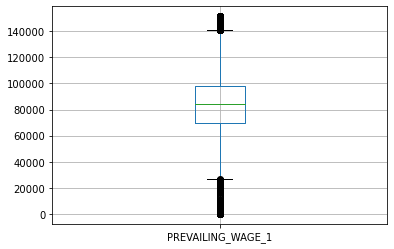

In [28]:
#After removal of outliers
H1B_visa.boxplot(column='PREVAILING_WAGE_1')

<Figure size 1440x1440 with 0 Axes>

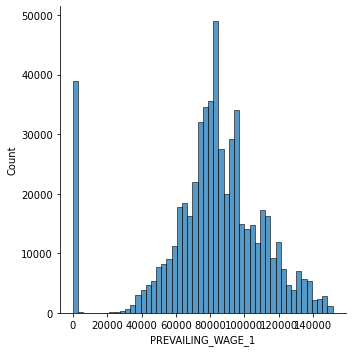

In [29]:
plt.figure(figsize=(20,20))
sns.displot(H1B_visa['PREVAILING_WAGE_1'], bins = 50)

WAGE_RATE_OF_PAY_TO_1 will be checked further.

<AxesSubplot:>

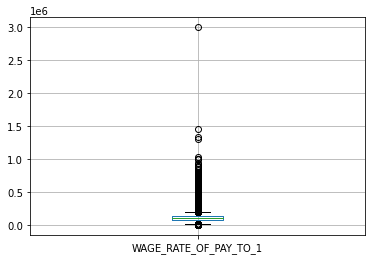

In [30]:
H1B_visa.boxplot(column='WAGE_RATE_OF_PAY_TO_1')

In [31]:
q1 = H1B_visa["WAGE_RATE_OF_PAY_TO_1"].quantile(0.1)
q3 = H1B_visa["WAGE_RATE_OF_PAY_TO_1"].quantile(0.9)
IQR = q3 - q1
mean = H1B_visa['WAGE_RATE_OF_PAY_TO_1'].mean()

In [32]:
H1B_visa['WAGE_RATE_OF_PAY_TO_1'] = H1B_visa['WAGE_RATE_OF_PAY_TO_1'].apply(lambda x: x if x != None and (x <= q1 + 1.5*IQR and x >= q1 - 1.5*IQR) else mean)

<AxesSubplot:>

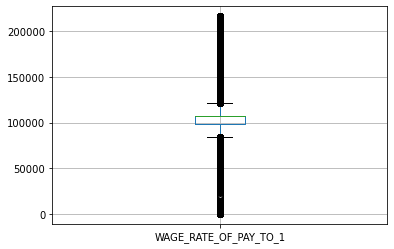

In [33]:
#After removal of outliers
H1B_visa.boxplot(column='WAGE_RATE_OF_PAY_TO_1')

<Figure size 1440x1440 with 0 Axes>

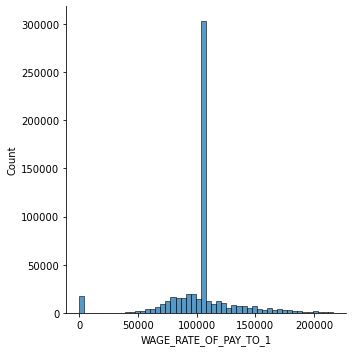

In [34]:
plt.figure(figsize=(20,20))
sns.displot(H1B_visa['WAGE_RATE_OF_PAY_TO_1'], bins = 50)

SECONDARY_ENTITY_1 is filled with mode because they describes Y or N.

In [35]:
H1B_visa['SECONDARY_ENTITY_1'] = H1B_visa['SECONDARY_ENTITY_1'].fillna(H1B_visa['SECONDARY_ENTITY_1'].mode()[0])
H1B_visa['SUPPORT_H1B'] = H1B_visa['SUPPORT_H1B'].fillna(H1B_visa['SUPPORT_H1B'].mode()[0])

Checked the whether are null are there or not.

In [36]:
H1B_visa.isnull().sum()

CASE_STATUS                    0
VISA_CLASS                     0
EMPLOYER_NAME                  0
AGENT_REPRESENTING_EMPLOYER    0
SECONDARY_ENTITY_1             0
JOB_TITLE                      0
SOC_TITLE                      0
SOC_CODE                       0
NAICS_CODE                     0
CONTINUED_EMPLOYMENT           0
CHANGE_PREVIOUS_EMPLOYMENT     0
NEW_CONCURRENT_EMPLOYMENT      0
CHANGE_EMPLOYER                0
AMENDED_PETITION               0
H-1B_DEPENDENT                 0
SUPPORT_H1B                    0
WILLFUL_VIOLATOR               0
WAGE_RATE_OF_PAY_FROM_1        0
WAGE_RATE_OF_PAY_TO_1          0
WAGE_UNIT_OF_PAY_1             0
TOTAL_WORKER_POSITIONS         0
PREVAILING_WAGE_1              0
dtype: int64

<AxesSubplot:>

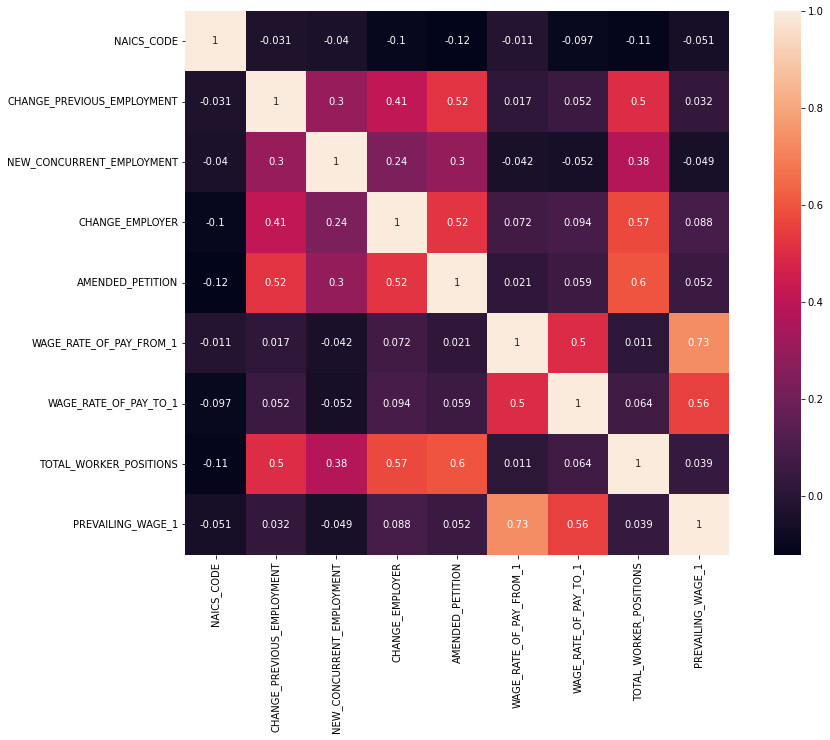

In [37]:
ax=plt.subplots(figsize=(16,10))
sns.heatmap(H1B_visa.corr(),vmax=1,square=True ,annot = True)

check data types once then can which has to be taken into the Feature Engineering part

In [38]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583806 entries, 24 to 664615
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  583806 non-null  object 
 1   VISA_CLASS                   583806 non-null  object 
 2   EMPLOYER_NAME                583806 non-null  object 
 3   AGENT_REPRESENTING_EMPLOYER  583806 non-null  object 
 4   SECONDARY_ENTITY_1           583806 non-null  object 
 5   JOB_TITLE                    583806 non-null  object 
 6   SOC_TITLE                    583806 non-null  object 
 7   SOC_CODE                     583806 non-null  object 
 8   NAICS_CODE                   583806 non-null  float64
 9   CONTINUED_EMPLOYMENT         583806 non-null  object 
 10  CHANGE_PREVIOUS_EMPLOYMENT   583806 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT    583806 non-null  float64
 12  CHANGE_EMPLOYER              583806 non-null  int64  
 13

check the duplicate values if they are then drop duplicated variables

In [39]:
duplicate =H1B_visa.duplicated()
print(duplicate.sum())
H1B_visa[duplicate]

120867


,CASE_STATUS,VISA_CLASS,EMPLOYER_NAME,AGENT_REPRESENTING_EMPLOYER,SECONDARY_ENTITY_1,JOB_TITLE,SOC_TITLE,SOC_CODE,NAICS_CODE,CONTINUED_EMPLOYMENT,...,CHANGE_EMPLOYER,AMENDED_PETITION,H-1B_DEPENDENT,SUPPORT_H1B,WILLFUL_VIOLATOR,WAGE_RATE_OF_PAY_FROM_1,WAGE_RATE_OF_PAY_TO_1,WAGE_UNIT_OF_PAY_1,TOTAL_WORKER_POSITIONS,PREVAILING_WAGE_1
139,CERTIFIED,H-1B,INDUSTRY CREATIVE LLC,Y,N,ACCOUNT DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541490.0,0,...,0,0,N,Y,N,90000.00,107449.1713,Year,1.0,75046.000000
166,CERTIFIED,H-1B,"ZENITH MEDIA SERVICES, INC.",Y,N,ASSOCIATE STRATEGY DIRECTOR,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541830.0,1,...,0,0,N,Y,N,102000.00,107449.1713,Year,1.0,94806.000000
173,CERTIFIED,H-1B,SUNGWON ANNANDALE LLC,Y,N,MARKETING AND PROMOTIONS MANAGER,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,445110.0,0,...,0,0,N,Y,N,46.00,107449.1713,Hour,1.0,45.240000
196,CERTIFIED,H-1B,FACEBOOK INC.,Y,N,"CREATIVE DIRECTOR, INSTAGRAM",ADVERTISING AND PROMOTIONS MANAGERS,11-2011,518112.0,0,...,0,0,Y,Y,N,178746.72,107449.1713,Year,1.0,84334.469125
207,CERTIFIED,H-1B,ENERGY BBDO INC.,Y,N,ACCOUNT EXECUTIVE,ADVERTISING AND PROMOTIONS MANAGERS,11-2011,541810.0,0,...,0,0,N,Y,N,48000.00,107449.1713,Year,1.0,47549.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664363,CERTIFIED,H-1B,NUTRA-MED PACKAGING INC,Y,N,QUALITY ASSURANCE SUPERVISOR,FIRST-LINE SUPERVISORS OF PRODUCTION AND OPERA...,51-1011,561910.0,1,...,0,0,N,Y,N,73000.00,107449.1713,Year,1.0,72134.000000
664584,CERTIFIED,H-1B,"MARLIN ENGINEERING, INC.",Y,N,TRAFFIC ENGINEER,TRAFFIC TECHNICIANS,53-6041,541330.0,0,...,0,0,N,Y,N,63000.00,107449.1713,Year,1.0,42515.000000
664599,CERTIFIED,H-1B,"EVEREST CONSULTANTS, INC.",Y,N,MARINE CONSULTANT SURVEYOR,TRANSPORTATION INSPECTORS,53-6051,541690.0,0,...,0,0,N,Y,N,31866.00,107449.1713,Year,1.0,31866.000000
664603,CERTIFIED,H-1B,AMSPEC LLC,Y,N,PETROLEUM INSPECTOR,TRANSPORTATION INSPECTORS,53-6051,541380.0,1,...,0,0,N,Y,N,75000.00,107449.1713,Year,1.0,58011.000000


In [40]:
H1B_visa.drop_duplicates(inplace=True)

In [41]:
dpl = H1B_visa.duplicated()
dpl.sum()

0

# Feature Engineering Analysis and scaling the features.

The following catergorical features will be sub-grouped in each feature into the low count categorical attributes.
EMPLOYER_NAME converted into EMPLOYER_BRANCH.
SOC_TITLE converted into SOC_TITLE_NEW.
JOB_TITLE converted into JOB_TITLE_NEW.
SOC_CODE converted into SOC_CODE_NEW.
CONTINUED_EMPLOYMENT saved as CONTINUED_EMPLOYMENT.

In [42]:
H1B_visa[H1B_visa['CASE_STATUS']=='DENIED']['EMPLOYER_NAME'].value_counts()[:50]
#print('EMPLOYER_NAME:\n',H1B_visa.EMPLOYER_NAME.value_counts())

ACCENTURE LLP                                                          68
GOOGLE LLC                                                             65
ERNST & YOUNG U.S. LLP                                                 54
CAPGEMINI AMERICA INC                                                  31
DXC TECHNOLOGY SERVICES LLC                                            23
AMAZON.COM SERVICES, INC.                                              19
FACEBOOK, INC.                                                         19
ELECTRONIC ARTS, INC.                                                  18
DELOITTE CONSULTING LLP                                                17
MICROSTRATEGY INCORPORATED                                             16
WIPRO LIMITED                                                          15
EQUINOX IT SOLUTIONS LLC                                               14
ASCENDUM SOLUTIONS, LLC                                                13
SEMETRIX INC                          

In [43]:
import sys
H1B_visa['EMPLOYER_BRANCH'] = 'OTHERS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('DELOITTE|PAYPAL|IBM|INFOSYS|ACCENTURE|APPLE|GOOGLE|CROCS|FACEBOOK|CAPGEMINI|ADOBE|WIPRO|TWITTER|MIND|INFOSYS|MICROSOFT|AIRLINES|IBM|ERNST|JPMORGAN|MINDTREE|AMAZON|TATA|QUALCOMM')] = 'TOP TECHS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('DESIGN|CAPITAL|MORRISON|LEGAL|OATH|HOLDINGS|BLUTAG|INVESTMENTS')] = ' ECOMMERCE & LAW SERVICES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('FURRION|MICROSTRATEGY|HARBOR|ELECTRONIC|MARIX|MICRO|ELECTRO|CHIP|DEVICE|INSTRUMENTS|INTEGRATORS|DELL|HEW|SEMICONDUCTORS|ENTERTAINMENT|LOGIC|LOGISTICS|CONTEXTLOGIC')] = 'ELECTRONIC & LOGISTICS SERVICES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('UNIVERSITY|UNIVERSITIES|ACADEMIC|INSTITUTIONS|SCIENCE|BIOSCIENCE|BIOSCIENCES|NATIONAL|SCHOOL|COLLEGE|INSTITUTE|SCIENTIFIC|LIFE|EDUCATION|ACADEMY|RESEARCH')] = 'UNIVERSITY'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('MASTER|BANK|CARD|VISA|MARKETS')] = 'MARKETS & BANKING COMPANIES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('PHARMA|NURSING|DOCOTRS|HOSPITAL|ANTHEM|PFIZER|REDBOCK|GOLDMAN|CAREMARK|DIAGNOSTICS|INTUIT|HEALTH|FIN|ECLINICAL WORKS|MEDTRONIC|DESMOND|FINANCIAL|MEDICAL|MED|CENTER|HEALTHCARE|MEDICAL')] = 'FINANCE AND MEDICAL SOLUTIONS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('BUSINESS|MANAGEMENT|APPLIED|SURVEYMONKEY|PEGS|FLOORING')] = 'BUSINESS SOLUTIONS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('CABLE|COMMUNICATIONS|PRICEWATERHOUSECOOPERS|LABS|COMMUNICATION|COMMUNICATIONS|NETWORK|DIGITAL|NETWORKS|LABORATORY|TELECOM|TEXPERTS')] = 'RESEARCH LABS & NETWORK& MOBILE SERVICES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('AUTODESK|AUTOBILE|AUTOMOTIVE|MOTOR|AUTO|FORD|PUMP|ELECTRICAL|ELECTRIC|TESLA|BOSCH|MACHINERY|CONSTRUCTION|SCIAPS|STEEL|VEHICLES')] = 'CIVIL & AUTOMOTIVE & ELECTRICAL'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('IDEXCEL|PARTNERS|TECHLIGENT|DEVELOPMENT|IT|COMPUTER|CYBER|TECHNOLOGY|TECH|MENSCHFORCE|ACCESS|INFORMATION')] = 'TECH SOLUTIONS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('ITCONNECTUS|DATA|CONNECT|SOLUTIONS|WEB|INFOTECH|CLOUD|VISION|GLOBAL|SYSTEMS|TECHNOSOFT|TECHNO|SERVICES|SECURITIES|SECURITY|TECHNOLOGIES|DATA|SOFTWARES|SOFTWARE')] = 'TECH SOLUTIONS'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('INTERNATIONAL|CONSULTING|CONSULTANT|RESOURCES|GROUP|ASSOCIATES|ANALYSTS|CONSULTANCY|CONSULTANTS')] = 'CONSULTING COMPANIES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('PRODUCT|PRODUCTS|ENTERPRISE|ENTERPRISES|SEMETRIX')] = 'PRODUCT &MANUFACTURERS &ENTERPRISE COMPANIES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('U.S.A.|USA|UNITED|STATES|US|AMERICA|U.S.')] = 'USA BASED COMPANIES'
H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('INDIA|CHINA')] = 'ASIAN BASED COMPANIES'
#H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('CORPORATION|CORP.')] = 'CORPORATE COMPANIES'
#H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('LLC.|LLC,|LLC')] = 'LLC COMPANIES'


C:\Users\User\AppData\Local\Temp\ipykernel_8872\3754980260.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('DELOITTE|PAYPAL|IBM|INFOSYS|ACCENTURE|APPLE|GOOGLE|CROCS|FACEBOOK|CAPGEMINI|ADOBE|WIPRO|TWITTER|MIND|INFOSYS|MICROSOFT|AIRLINES|IBM|ERNST|JPMORGAN|MINDTREE|AMAZON|TATA|QUALCOMM')] = 'TOP TECHS'
C:\Users\User\AppData\Local\Temp\ipykernel_8872\3754980260.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['EMPLOYER_BRANCH'][H1B_visa['EMPLOYER_NAME'].str.contains('DESIGN|CAPITAL|MORRISON|LEGAL|OATH|HOLDINGS|BLUTAG|INVESTMENTS')] = ' ECOM

In [44]:
H1B_visa['EMPLOYER_BRANCH'].value_counts()

TECH SOLUTIONS                                  159664
OTHERS                                          116132
USA BASED COMPANIES                              68530
CONSULTING COMPANIES                             44986
TOP TECHS                                        24095
FINANCE AND MEDICAL SOLUTIONS                    13193
ELECTRONIC & LOGISTICS SERVICES                   8346
RESEARCH LABS & NETWORK& MOBILE SERVICES          5685
UNIVERSITY                                        5250
CIVIL & AUTOMOTIVE & ELECTRICAL                   4929
PRODUCT &MANUFACTURERS &ENTERPRISE COMPANIES      3493
BUSINESS SOLUTIONS                                2907
ASIAN BASED COMPANIES                             1991
MARKETS & BANKING COMPANIES                       1900
 ECOMMERCE & LAW SERVICES                         1838
Name: EMPLOYER_BRANCH, dtype: int64

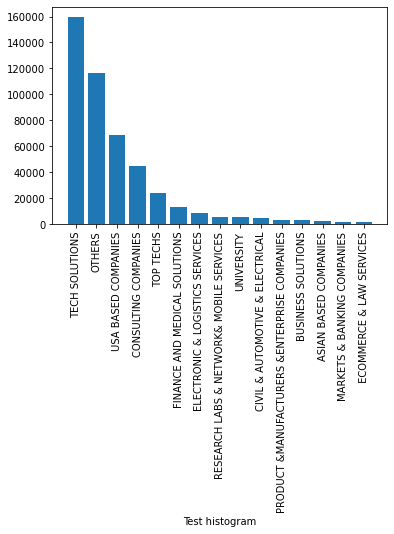

In [45]:
#z1 = H1B_visa[H1B_visa['CASE_STATUS']=='CERTIFIED']['EMPLOYER_BRANCH'].value_counts()
#z2  =H1B_visa[H1B_visa['CASE_STATUS']=='DENIED']['EMPLOYER_BRANCH'].value_counts()
#fig, ax1 = plt.subplots()
#ax1.bar(z2,z2.index)
#ax1.bar(z1,z1.index)
#plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
 
#ax.bar(H1B_visa[H1B_visa['CASE_STATUS']=='CERTIFIED']['EMPLOYER_BRANCH'].value_counts().index,H1B_visa[H1B_visa['CASE_STATUS']=='CERTIFIED']['EMPLOYER_BRANCH'].value_counts(),color='b')
ax.bar(H1B_visa['EMPLOYER_BRANCH'].value_counts().index,H1B_visa['EMPLOYER_BRANCH'].value_counts())

plt.xticks(rotation='vertical')
ax.set_xlabel('Test histogram')
plt.show()

In [46]:
H1B_visa[H1B_visa['CASE_STATUS']=='DENIED']['SOC_TITLE'].value_counts()[:50]
#print('SOC_TITLE:\n',H1B_visa.SOC_TITLE.value_counts())

SOFTWARE DEVELOPERS, APPLICATIONS                                           1143
COMPUTER OCCUPATIONS, ALL OTHER                                              288
COMPUTER SYSTEMS ANALYSTS                                                    202
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE                                        189
ACCOUNTANTS AND AUDITORS                                                     142
FINANCIAL ANALYSTS                                                            96
MARKET RESEARCH ANALYSTS AND MARKETING SPECIALISTS                            96
PHYSICIANS AND SURGEONS, ALL OTHER                                            94
COMPUTER PROGRAMMERS                                                          88
MECHANICAL ENGINEERS                                                          86
CIVIL ENGINEERS                                                               85
MANAGEMENT ANALYSTS                                                           83
ELECTRICAL ENGINEERS        

In [47]:
import sys
H1B_visa['SOC_TITLE_NEW'] = 'others'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('DESKTOP||HARDWARE|WEB|SOFTWARE|COMPUTER|INFORMATION|SECURITY|DEVELOPERS')] = 'IT ENGINEERS'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('HEAVY|CONCRETE|PILOTS|DRAFTERS|AUTOMOTIVE|MECHANICS|INTERIORS|LANDSCAPE|MECHANICAL|DESIGN|MARINE|INDUSTRIAL|MATERIALS|CONSTRUCTION|ARCHITECHTURAL|ARCHITECTS|PETROLEUM')] = 'MECHANICAL & CIVIL'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('SALESPERSONS|INSURANCE|AGENTS|WHOLESALE|RETAIL|CREDIT|SALES|MARKET|COST|ESTIMATORS|MARKETING')] = 'SALES & EXECUTIVES'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('LODGING|DIRECTORS|CHIEF|EXECUTIVES|MANAGEMENT|MANAGERS')] = 'MANAGER'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('BIOINFORMATICS|CHEMISTS|CHEMICAL|BIOCHEMISTS|BIOPHYSICISTS')] = 'CHEMICAL ENGINEERS'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('R&D|GEOSCIENTISTS|SPEECH|DATA|LIFE|DATABASE|STATISTICIANS|ACCOUNTANTS|SCIENTISTS')] = 'DATABASE & SCIENTISTS'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('BROADCAST|TELECOMMUNICATION|NETWORK|ELECTRONICS|ELECTRICAL|LOGISTICIANS|TRANSPORTATION|STORAGE')] = 'ELECTRONICS ^ LOGISTICS'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('ACCOUNTING|ECONOMICS|FINANCIAL|ECONOMISTS|POLITICAL')] = 'FINANCE'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('COUNSELORS|COMPLIANCE|PUBLIC RELATIONS|FUNDRAISING|URBAN|REGIONAL')] = 'P.R & URBAN'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('EDITORS|LAW|PARALEGALS|LEGALS')] = 'ADMINSTRATIVE & LAW'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('AUDIOLOGISTS|ACCOUNTANTS|AUDITORS|COMPLIANCE|ADVERTISING|PROMOTIONS|INTERPRETERS|TRANSLATORS')] = 'AUDIT & ADVERTISEMENT'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('SUPERVISOR|MEDIA|EDITORS|RECRUITERS|FILM|VIDEO|REPORTERS|CORRESPONDENTS|HUMAN|RESOURCES|FASHION|DESIGNERS')] = 'H.R & FASHION'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('HELPERS|FOUNDRY|MAIDS|ENVIRONMENTAL|SOIL|PLANT|MICROBIOLOGISTS|AGRICULTURAL|FARM|CHEFS|COOKS|FARMERS|RANCHERS|RESTAURANT ')] = 'AGRICULTURE & CHEFS'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('ATHLETIC|ATHLETES|NATURAL|DEVELOPMENT|TRAINING|EDUCATION|COACHES|SCOUTS|EXERCISE')] = 'EDUCATION & TRAINING'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('OBSTETRICIANS|GYNECOLOGISTS|DENTISTS|DIETITIANS|UTRITIONIST|NURSE|DENTAL|PRACTIONERS|PHYSICIST|GENERAL|THERAPISTS|VETERINARIANS|SURGEONS|PSYCOLOGIST|PHYSIOLOGISTS|PSYCHOLOGY|CHIROPRACTORS|PHARMACY')] = 'MEDICAL'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('EVENT|CONVENTION|ART|DRAMA|MUSIC|TEACHER|WRITERS|TEACHERS|POSTSECONDARY|KINDERGARTEN|ELEMENTARY|SCHOOL|ARTISTS|ANIMATORS|PHYSICS|MATHEMATICIANS|MATHEMATICAL|SOCIAL')] = 'Education'
H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('UNDERWRITERS|LABORERS|TECHNICIANS|WORKERS|CHEMISTS|BIOCHEMISTS|LIBRARIANS|OPERATORS|ASSISTANTS|WORKERS')] = 'TECHNICIANS'


C:\Users\User\AppData\Local\Temp\ipykernel_8872\2292080180.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('DESKTOP||HARDWARE|WEB|SOFTWARE|COMPUTER|INFORMATION|SECURITY|DEVELOPERS')] = 'IT ENGINEERS'
C:\Users\User\AppData\Local\Temp\ipykernel_8872\2292080180.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['SOC_TITLE_NEW'][H1B_visa['SOC_TITLE'].str.contains('HEAVY|CONCRETE|PILOTS|DRAFTERS|AUTOMOTIVE|MECHANICS|INTERIORS|LANDSCAPE|MECHANICAL|DESIGN|MARINE|INDUSTRIAL|MATERIALS|CONSTRUCTION|ARCHITECHTURAL|ARCHITECTS|PETROLEUM')] = 'MECHANICAL & CI

In [48]:
H1B_visa['SOC_TITLE_NEW'].value_counts()

IT ENGINEERS               294596
DATABASE & SCIENTISTS       28725
MANAGER                     23603
ELECTRONICS ^ LOGISTICS     22647
MECHANICAL & CIVIL          18571
Education                   13740
FINANCE                     12578
MEDICAL                     11183
AUDIT & ADVERTISEMENT        9654
SALES & EXECUTIVES           8548
TECHNICIANS                  7241
H.R & FASHION                4776
AGRICULTURE & CHEFS          1863
ADMINSTRATIVE & LAW          1510
P.R & URBAN                  1370
EDUCATION & TRAINING         1291
CHEMICAL ENGINEERS           1043
Name: SOC_TITLE_NEW, dtype: int64

In [49]:
H1B_visa['JOB_TITLE'].value_counts()

SOFTWARE ENGINEER                             22194
SOFTWARE DEVELOPER                            21402
SENIOR SOFTWARE ENGINEER                       6073
ASSISTANT PROFESSOR                            4034
JAVA DEVELOPER                                 2957
                                              ...  
DEVELOPMENT AND OPERATIONS ENGINEER               1
PRINCIPAL INSURANCE APPLICATIONS ARCHITECT        1
EMBEDDED SOFTWARE CONSULTANT                      1
SENIOR PERFORMANCE ASSOCIATE                      1
DIGITAL TOUCHPOINTS ANALYST                       1
Name: JOB_TITLE, Length: 100818, dtype: int64

In [50]:
import sys
H1B_visa['JOB_TITLE_NEW'] = 'others'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('IOS|DEVOPS|CLOUD|FRONT END|INTERIOR|.NET|DEVOPS|SOFTWARE|COMPUTER|INFORMATION|SECURITY|SYSTEMS|AUTOMATION|SYSTEMS|FULL STACK|LEAD|JAVA|IT|TEST|GRAPHIC|SUPPORT')] = 'IT & SOFTWARE ENGINEERS'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('QA|ENGAGEMENT|OPERATIONS|DELIVERY|INFRASTRUCTURE|FIRMWARE|ANDRIOD|UX|RF|PYTHON|TABLEAU|HADOOP|INFORMATICA|SQL|BI|SCRUM|VALIDATION|APPLICATIONS|UI|PROGRAMMER|DEVELOPER|SOLUTION|RPA')] = 'IT & SOFTWARE ENGINEERS'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('LANDSCAPE|CAD|SITE|FIELD|QUALITY|MECHANICAL DESIGN|STRUCTURAL|DESIGNER|SIMULATION|ENGINEERING|MARINE|INDUSTRIAL|MATERIALS|MECHANICAL|MANUFACTURING|CIVIL')] = 'MECHANICAL & CIVIL ENGINEER '
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('ACCOUNTANT|FINANCIAL|QUANTITATIVE|RISK|BUDGET|TAX')] = 'FINANCE TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('PRESIDENT|DIRECTOR|MANAGER')] = 'Manager & DIRECTORS'
#H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('ELECTRICAL|CHEMICAL')] = 'ELECTRICAL ENGINEERS'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('SERVICE|AEM|EMBEDDED|DIGITAL|NETWORK|CONTROLS|HARDWARE|FUNCTIONAL|ELECTRICAL|CHEMICAL')] = 'ELECTRONICS & ELECTRICAL ENGINEERS TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('PUBLIC|LAWYERS|ATTORNEY|LAW')] = 'LAW TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('SALESFORCE|MARKET|MARKETING|SUPPLY')] = 'MARKETING TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('SPEECH|BIG|ORACLE|MACHINE|DATABASE|DATA|SCIENTIST|ASSOCIATES')] = 'DATABASE & SCIENTISTS'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('ARCHITECT|ARCHITECTURAL')] = 'ARCHITECT'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('TEACHER|PROFESSOR|POSTDOCTORAL|FELLOW|SCHOLAR|LECTURER|LABORATORY')] = 'EDUCATIONAL ORGANISATION'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('BUSINESS|ADMINISTRATOR|INVESTMENT|ACCOUNT')] = 'BUSINESS TEAM'
H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('DENTIST|HOSPITALIST|THERAPIST|PSYCHIATRIST|PEDIATRICIAN|PHYSICIAN|FAMILY|NEPHROLOGIST')] = 'MEDICAL TEAM'
#H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('SENIOR|SR.|SR')] = 'SENIOR TEAM'
#H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('ANALYST')] = 'ANALYST TEAM'

C:\Users\User\AppData\Local\Temp\ipykernel_8872\2870454930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('IOS|DEVOPS|CLOUD|FRONT END|INTERIOR|.NET|DEVOPS|SOFTWARE|COMPUTER|INFORMATION|SECURITY|SYSTEMS|AUTOMATION|SYSTEMS|FULL STACK|LEAD|JAVA|IT|TEST|GRAPHIC|SUPPORT')] = 'IT & SOFTWARE ENGINEERS'
C:\Users\User\AppData\Local\Temp\ipykernel_8872\2870454930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H1B_visa['JOB_TITLE_NEW'][H1B_visa['JOB_TITLE'].str.contains('QA|ENGAGEMENT|OPERATIONS|DELIVERY|INFRASTRUCTURE|FIRMWARE|ANDRIOD|UX|RF|PYTHON|TABLEAU|HAD

In [51]:
H1B_visa['JOB_TITLE_NEW'].value_counts()


IT & SOFTWARE ENGINEERS                    196537
others                                      73023
Manager & DIRECTORS                         41956
BUSINESS TEAM                               31547
DATABASE & SCIENTISTS                       26275
MECHANICAL & CIVIL ENGINEER                 24233
EDUCATIONAL ORGANISATION                    16471
ARCHITECT                                   16346
ELECTRONICS & ELECTRICAL ENGINEERS TEAM     13514
MEDICAL TEAM                                 7798
MARKETING TEAM                               7518
FINANCE TEAM                                 6331
LAW TEAM                                     1390
Name: JOB_TITLE_NEW, dtype: int64

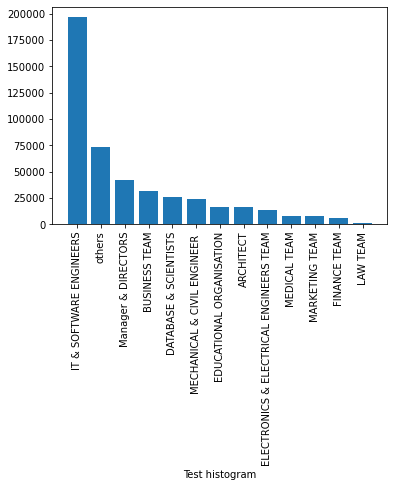

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
 
#ax.bar(H1B_visa[H1B_visa['CASE_STATUS']=='CERTIFIED']['JOB_TITLE_NEW'].value_counts().index,H1B_visa[H1B_visa['CASE_STATUS']=='CERTIFIED']['JOB_TITLE_NEW'].value_counts(),color='b')
ax.bar(H1B_visa['JOB_TITLE_NEW'].value_counts().index,H1B_visa['JOB_TITLE_NEW'].value_counts())

plt.xticks(rotation='vertical')
ax.set_xlabel('Test histogram')
plt.show()

In [53]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462939 entries, 24 to 664615
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CASE_STATUS                  462939 non-null  object 
 1   VISA_CLASS                   462939 non-null  object 
 2   EMPLOYER_NAME                462939 non-null  object 
 3   AGENT_REPRESENTING_EMPLOYER  462939 non-null  object 
 4   SECONDARY_ENTITY_1           462939 non-null  object 
 5   JOB_TITLE                    462939 non-null  object 
 6   SOC_TITLE                    462939 non-null  object 
 7   SOC_CODE                     462939 non-null  object 
 8   NAICS_CODE                   462939 non-null  float64
 9   CONTINUED_EMPLOYMENT         462939 non-null  object 
 10  CHANGE_PREVIOUS_EMPLOYMENT   462939 non-null  int64  
 11  NEW_CONCURRENT_EMPLOYMENT    462939 non-null  float64
 12  CHANGE_EMPLOYER              462939 non-null  int64  
 13

In [54]:
print(H1B_visa.SOC_CODE) 

24                             11-2011
26                             11-2011
47                             11-2011
52                             11-2011
54                             11-2011
                      ...             
664611    OPERATIONS RESEARCH ANALYSTS
664612                         15-1132
664613                         15-1132
664614                         15-1132
664615                         15-1132
Name: SOC_CODE, Length: 462939, dtype: object


In [55]:
H1B_visa['SOC_CODE'] = H1B_visa['SOC_CODE'].replace(['OPERATIONS RESEARCH ANALYSTS'],'15')
H1B_visa['SOC_CODE_NEW'] = H1B_visa['SOC_CODE'].str.split("-").str[0]
H1B_visa['SOC_CODE_NEW'] = H1B_visa['SOC_CODE_NEW'].replace(['39','35','53','51','47','49','31','33','45','37'],'10 codes lessthan 100')
H1B_visa['SOC_CODE_NEW'].value_counts()

15                       310515
17                        41619
13                        37547
11                        19010
19                        17850
29                        12538
25                        11858
27                         5949
41                         2786
23                         1774
21                          945
10 codes lessthan 100       281
43                          267
Name: SOC_CODE_NEW, dtype: int64

In [56]:
#H1B_visa['NAICS_CODE'] = H1B_visa['NAICS_CODE'].astype(str).str[0:2]

In [57]:
H1B_visa['WAGE_UNIT_OF_PAY_1'].value_counts()

Year         431931
Hour          30548
Month           316
Bi-Weekly        89
Week             55
Name: WAGE_UNIT_OF_PAY_1, dtype: int64

In [58]:
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['001','01'],'1')
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['00'],'0')
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['02'],'2')
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['B'],'1')
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['0',],'1')
H1B_visa['CONTINUED_EMPLOYMENT'] = H1B_visa['CONTINUED_EMPLOYMENT'].replace(['25','20','15','6','8','12','30','50','40','18','35','13','7','99','45','17','21','11'],'lower values 100 frequency')
H1B_visa['CONTINUED_EMPLOYMENT'].value_counts()


1                             453879
5                               3554
2                               2262
4                               1213
10                               944
3                                618
lower values 100 frequency       469
Name: CONTINUED_EMPLOYMENT, dtype: int64

After binning large set of categorical features, drop the old columns features which are replaced with new one.

In [59]:
print(H1B_visa.dtypes)

CASE_STATUS                     object
VISA_CLASS                      object
EMPLOYER_NAME                   object
AGENT_REPRESENTING_EMPLOYER     object
SECONDARY_ENTITY_1              object
JOB_TITLE                       object
SOC_TITLE                       object
SOC_CODE                        object
NAICS_CODE                     float64
CONTINUED_EMPLOYMENT            object
CHANGE_PREVIOUS_EMPLOYMENT       int64
NEW_CONCURRENT_EMPLOYMENT      float64
CHANGE_EMPLOYER                  int64
AMENDED_PETITION                 int64
H-1B_DEPENDENT                  object
SUPPORT_H1B                     object
WILLFUL_VIOLATOR                object
WAGE_RATE_OF_PAY_FROM_1        float64
WAGE_RATE_OF_PAY_TO_1          float64
WAGE_UNIT_OF_PAY_1              object
TOTAL_WORKER_POSITIONS         float64
PREVAILING_WAGE_1              float64
EMPLOYER_BRANCH                 object
SOC_TITLE_NEW                   object
JOB_TITLE_NEW                   object
SOC_CODE_NEW             

In [60]:
H1B_visa.drop('VISA_CLASS', axis=1, inplace=True) 
H1B_visa.drop('EMPLOYER_NAME', axis=1, inplace=True) 
H1B_visa.drop('JOB_TITLE', axis=1, inplace=True) 
H1B_visa.drop('SOC_TITLE', axis=1, inplace=True) 
H1B_visa.drop('SOC_CODE', axis=1, inplace=True) 


In [61]:
print(H1B_visa.dtypes)

CASE_STATUS                     object
AGENT_REPRESENTING_EMPLOYER     object
SECONDARY_ENTITY_1              object
NAICS_CODE                     float64
CONTINUED_EMPLOYMENT            object
CHANGE_PREVIOUS_EMPLOYMENT       int64
NEW_CONCURRENT_EMPLOYMENT      float64
CHANGE_EMPLOYER                  int64
AMENDED_PETITION                 int64
H-1B_DEPENDENT                  object
SUPPORT_H1B                     object
WILLFUL_VIOLATOR                object
WAGE_RATE_OF_PAY_FROM_1        float64
WAGE_RATE_OF_PAY_TO_1          float64
WAGE_UNIT_OF_PAY_1              object
TOTAL_WORKER_POSITIONS         float64
PREVAILING_WAGE_1              float64
EMPLOYER_BRANCH                 object
SOC_TITLE_NEW                   object
JOB_TITLE_NEW                   object
SOC_CODE_NEW                    object
dtype: object


# Convert categorical encoding features into numerical encoding 

Here, Label encoding is used for conversion of caterogical variables

CASE_STATUS of CERTIFIED = 0, 
CASE_STATUS of DENIED = 1

In [62]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.CASE_STATUS)
# print list(le.classes_)
H1B_visa['CASE_STATUS_N']=le.transform(H1B_visa['CASE_STATUS'])
H1B_visa['CASE_STATUS_N'].value_counts()

0    458220
1      4719
Name: CASE_STATUS_N, dtype: int64

AGENT_REPRESENTING_EMPLOYER of Y = 1,
AGENT_REPRESENTING_EMPLOYER of N = 0

In [63]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.AGENT_REPRESENTING_EMPLOYER)
# print list(le.classes_)
H1B_visa['AGENT_REPRESENTING_EMPLOYER_N']=le.transform(H1B_visa['AGENT_REPRESENTING_EMPLOYER'])
H1B_visa['AGENT_REPRESENTING_EMPLOYER_N'].value_counts()

1    356466
0    106473
Name: AGENT_REPRESENTING_EMPLOYER_N, dtype: int64

EMPLOYER_BRANCH is converted into 0 t0 14 numerics

In [64]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.EMPLOYER_BRANCH)
# print list(le.classes_)
H1B_visa['EMPLOYER_BRANCH_N']=le.transform(H1B_visa['EMPLOYER_BRANCH'])
H1B_visa['EMPLOYER_BRANCH_N'].value_counts()

11    159664
8     116132
14     68530
4      44986
12     24095
6      13193
5       8346
10      5685
13      5250
3       4929
9       3493
2       2907
1       1991
7       1900
0       1838
Name: EMPLOYER_BRANCH_N, dtype: int64

SOC_TITLE_NEW is converted into 0 t0 16 numerics.

In [65]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.SOC_TITLE_NEW)
# print list(le.classes_)
H1B_visa['SOC_TITLE_NEW_N']=le.transform(H1B_visa['SOC_TITLE_NEW'])
H1B_visa['SOC_TITLE_NEW_N'].value_counts()

10    294596
4      28725
11     23603
6      22647
12     18571
7      13740
8      12578
13     11183
2       9654
15      8548
16      7241
9       4776
1       1863
0       1510
14      1370
5       1291
3       1043
Name: SOC_TITLE_NEW_N, dtype: int64

JOB_TITLE_NEW is converted into 0 t0 12 numerics

In [66]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.JOB_TITLE_NEW)
# print list(le.classes_)
H1B_visa['JOB_TITLE_NEW_N']=le.transform(H1B_visa['JOB_TITLE_NEW'])
H1B_visa['JOB_TITLE_NEW_N'].value_counts()

6     196537
12     73023
11     41956
1      31547
2      26275
9      24233
3      16471
0      16346
4      13514
10      7798
8       7518
5       6331
7       1390
Name: JOB_TITLE_NEW_N, dtype: int64

SECONDARY_ENTITY_1 is converted into the SECONDARY_ENTITY_1_N

In [67]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.SECONDARY_ENTITY_1)
# print list(le.classes_)
H1B_visa['SECONDARY_ENTITY_1_N']=le.transform(H1B_visa['SECONDARY_ENTITY_1'])
H1B_visa['SECONDARY_ENTITY_1_N'].value_counts()

0    314539
1    148400
Name: SECONDARY_ENTITY_1_N, dtype: int64

H-1B_DEPENDENT of Y = 1, H-1B_DEPENDENT of N = 0

In [68]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa['H-1B_DEPENDENT'])
# print list(le.classes_)
H1B_visa['H-1B_DEPENDENT_N']=le.transform(H1B_visa['H-1B_DEPENDENT'])
H1B_visa['H-1B_DEPENDENT_N'].value_counts()

0    318958
1    143981
Name: H-1B_DEPENDENT_N, dtype: int64

CONTINUED_EMPLOYMENT is converted into 0 to 6 metrics.

In [69]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.CONTINUED_EMPLOYMENT)
# print list(le.classes_)
H1B_visa['CONTINUED_EMPLOYMENT_N']=le.transform(H1B_visa['CONTINUED_EMPLOYMENT'])
H1B_visa['CONTINUED_EMPLOYMENT_N'].value_counts()

0    453879
5      3554
2      2262
4      1213
1       944
3       618
6       469
Name: CONTINUED_EMPLOYMENT_N, dtype: int64

SUPPORT_H1B of Y = 1, SUPPORT_H1B of N = 0

In [70]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.SUPPORT_H1B)
# print list(le.classes_)
H1B_visa['SUPPORT_H1B_N']=le.transform(H1B_visa['SUPPORT_H1B'])
H1B_visa['SUPPORT_H1B_N'].value_counts()

1    461414
0      1525
Name: SUPPORT_H1B_N, dtype: int64

WILLFUL_VIOLATOR of Y = 0, WILLFUL_VIOLATOR of N = 1

In [71]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.WILLFUL_VIOLATOR)
# print list(le.classes_)
H1B_visa['WILLFUL_VIOLATOR_N']=le.transform(H1B_visa['WILLFUL_VIOLATOR'])
H1B_visa['WILLFUL_VIOLATOR_N'].value_counts()

0    462740
1       199
Name: WILLFUL_VIOLATOR_N, dtype: int64

WAGE_UNIT_OF_PAY_1 is converted into 0 to 4 metrics.

In [72]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.WAGE_UNIT_OF_PAY_1)
# print list(le.classes_)
H1B_visa['WAGE_UNIT_OF_PAY_1_N']=le.transform(H1B_visa['WAGE_UNIT_OF_PAY_1'])
H1B_visa['WAGE_UNIT_OF_PAY_1_N'].value_counts()

4    431931
1     30548
2       316
0        89
3        55
Name: WAGE_UNIT_OF_PAY_1_N, dtype: int64

SOC_CODE_NEW is converted into 0 to 12 metrics.

In [73]:
le = preprocessing.LabelEncoder()
le.fit(H1B_visa.SOC_CODE_NEW)
# print list(le.classes_)
H1B_visa['SOC_CODE_NEW_N']=le.transform(H1B_visa['SOC_CODE_NEW'])
H1B_visa['SOC_CODE_NEW_N'].value_counts()

3     310515
4      41619
2      37547
1      19010
5      17850
10     12538
8      11858
9       5949
11      2786
7       1774
6        945
0        281
12       267
Name: SOC_CODE_NEW_N, dtype: int64

In [74]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462939 entries, 24 to 664615
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CASE_STATUS                    462939 non-null  object 
 1   AGENT_REPRESENTING_EMPLOYER    462939 non-null  object 
 2   SECONDARY_ENTITY_1             462939 non-null  object 
 3   NAICS_CODE                     462939 non-null  float64
 4   CONTINUED_EMPLOYMENT           462939 non-null  object 
 5   CHANGE_PREVIOUS_EMPLOYMENT     462939 non-null  int64  
 6   NEW_CONCURRENT_EMPLOYMENT      462939 non-null  float64
 7   CHANGE_EMPLOYER                462939 non-null  int64  
 8   AMENDED_PETITION               462939 non-null  int64  
 9   H-1B_DEPENDENT                 462939 non-null  object 
 10  SUPPORT_H1B                    462939 non-null  object 
 11  WILLFUL_VIOLATOR               462939 non-null  object 
 12  WAGE_RATE_OF_PAY_FROM_1      

In [75]:
H1B_visa.drop('CASE_STATUS', axis=1, inplace=True) 
H1B_visa.drop('AGENT_REPRESENTING_EMPLOYER', axis=1, inplace=True) 
H1B_visa.drop('EMPLOYER_BRANCH', axis=1, inplace=True) 
#H1B_visa.drop('EMPLOYER_NAME', axis=1, inplace=True)
H1B_visa.drop('SOC_CODE_NEW', axis=1, inplace=True) 
H1B_visa.drop('JOB_TITLE_NEW', axis=1, inplace=True) 
#H1B_visa.drop('SOC_TITLE', axis=1, inplace=True) 
#H1B_visa.drop('JOB_TITLE', axis=1, inplace=True) 
H1B_visa.drop('SECONDARY_ENTITY_1', axis=1, inplace=True)
H1B_visa.drop('CONTINUED_EMPLOYMENT', axis=1, inplace=True) 
H1B_visa.drop('H-1B_DEPENDENT', axis=1, inplace=True) 
H1B_visa.drop('SUPPORT_H1B', axis=1, inplace=True) 
H1B_visa.drop('WILLFUL_VIOLATOR', axis=1, inplace=True) 
H1B_visa.drop('WAGE_UNIT_OF_PAY_1', axis=1, inplace=True)
H1B_visa.drop('SOC_TITLE_NEW', axis=1, inplace=True)



#num_select_columns = ['output_CASE_STATUS','AGENT_REPRESENTING_EMPLOYER_NUM','EMPLOYER_BRANCH_NUM','SOC_TITLE_NEW_NUM','JOB_TITLE_NEW_NUM','SECONDARY_ENTITY_1_NUM','CONTINUED_EMPLOYMENT_NUM','H_1B_DEPENDENT_NUM','SUPPORT_H1B_NUM','WILLFUL_VIOLATOR_NUM','WAGE_UNIT_OF_PAY_1_NUM','SOC_CODE_NEW_NUM','NAICS_CODE_NEW_NUM']

In [76]:
H1B_visa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462939 entries, 24 to 664615
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   NAICS_CODE                     462939 non-null  float64
 1   CHANGE_PREVIOUS_EMPLOYMENT     462939 non-null  int64  
 2   NEW_CONCURRENT_EMPLOYMENT      462939 non-null  float64
 3   CHANGE_EMPLOYER                462939 non-null  int64  
 4   AMENDED_PETITION               462939 non-null  int64  
 5   WAGE_RATE_OF_PAY_FROM_1        462939 non-null  float64
 6   WAGE_RATE_OF_PAY_TO_1          462939 non-null  float64
 7   TOTAL_WORKER_POSITIONS         462939 non-null  float64
 8   PREVAILING_WAGE_1              462939 non-null  float64
 9   CASE_STATUS_N                  462939 non-null  int32  
 10  AGENT_REPRESENTING_EMPLOYER_N  462939 non-null  int32  
 11  EMPLOYER_BRANCH_N              462939 non-null  int32  
 12  SOC_TITLE_NEW_N              

In [77]:
select_columns_for_MNB = ['JOB_TITLE_NEW_N','EMPLOYER_BRANCH_N','SOC_CODE_NEW_N','SOC_TITLE_NEW_N','NAICS_CODE']
H1B_visa_MNB = H1B_visa[select_columns_for_MNB]

select_column_wage_rate = ['WAGE_RATE_OF_PAY_FROM_1', 'WAGE_RATE_OF_PAY_TO_1','WAGE_UNIT_OF_PAY_1_N','PREVAILING_WAGE_1']
H1B_visa_wage = H1B_visa[select_column_wage_rate]

y=H1B_visa['CASE_STATUS_N']
y1=H1B_visa['CASE_STATUS_N']

In [78]:
H1B_visa[select_columns_for_MNB].head()

,JOB_TITLE_NEW_N,EMPLOYER_BRANCH_N,SOC_CODE_NEW_N,SOC_TITLE_NEW_N,NAICS_CODE
24,11,4,1,2,511210.0
26,11,14,1,2,56142.0
47,11,11,1,2,611310.0
52,11,11,1,2,541830.0
54,11,12,1,2,334111.0


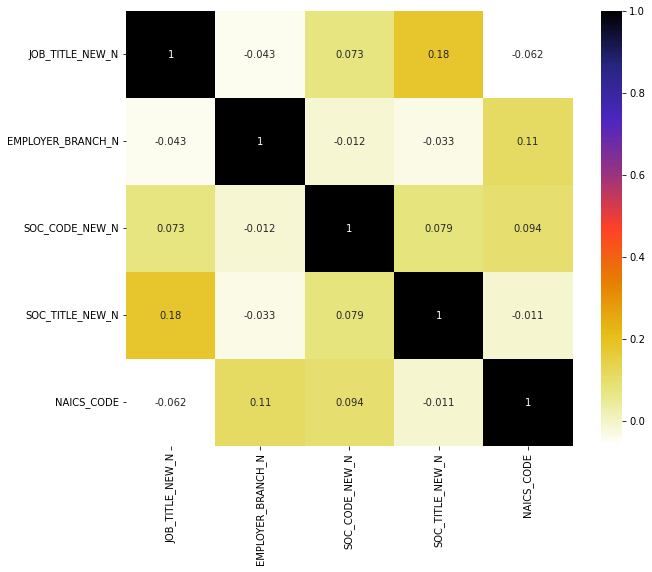

In [79]:
plt.figure(figsize=(10, 8))
correl_1 = H1B_visa[select_columns_for_MNB].corr()
sns.heatmap(correl_1, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

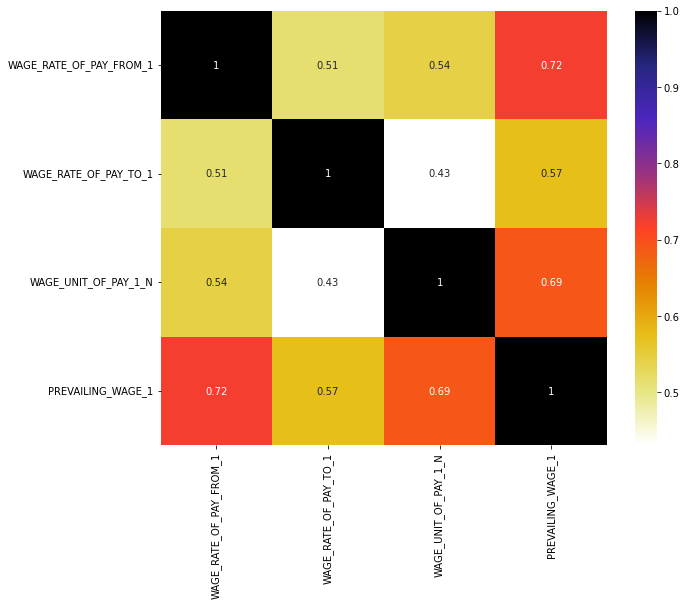

In [80]:
plt.figure(figsize=(10, 8))
correl_2 = H1B_visa[select_column_wage_rate].corr()
sns.heatmap(correl_2, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [81]:
correl = H1B_visa.corr()

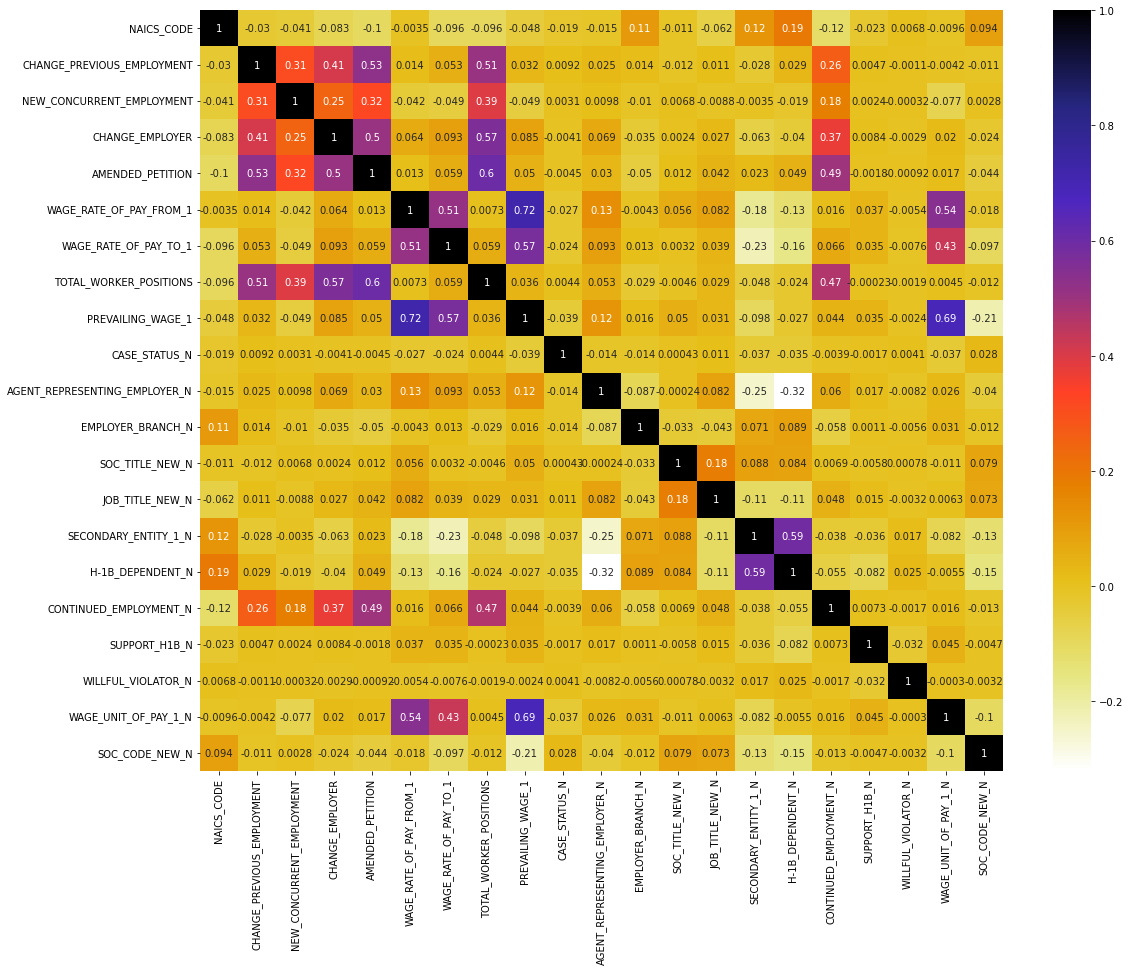

In [82]:
plt.figure(figsize=(18, 14))
correl = H1B_visa.corr()
sns.heatmap(correl, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [83]:
H1B_visa.to_csv("cleaned_H1B_visa.csv")

# Modelling part

First part, Multinomial navies Bayes Model

In [84]:

select_columns_for_MNB = ['JOB_TITLE_NEW_N','EMPLOYER_BRANCH_N','SOC_CODE_NEW_N','SOC_TITLE_NEW_N','NAICS_CODE']
H1B_visa_MNB = H1B_visa[select_columns_for_MNB]

select_column_wage_rate = ['WAGE_RATE_OF_PAY_FROM_1', 'WAGE_RATE_OF_PAY_TO_1','WAGE_UNIT_OF_PAY_1_N','PREVAILING_WAGE_1']
H1B_visa_wage = H1B_visa[select_column_wage_rate]

In [85]:
X = H1B_visa_MNB
y= H1B_visa['CASE_STATUS_N']

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.4,random_state=42)

In [87]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

In [88]:
predictions=clf.predict(x_val)

In [89]:
from sklearn import metrics
metrics.accuracy_score(y_val, predictions)

0.987762993044455

In [90]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_val, predictions))
print(classification_report(y_val, predictions))

[[182886    368]
 [  1898     24]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    183254
           1       0.06      0.01      0.02      1922

    accuracy                           0.99    185176
   macro avg       0.53      0.51      0.51    185176
weighted avg       0.98      0.99      0.98    185176



In [91]:
!pip install imblearn graphviz xgboost

# Oversampling using smote

In [92]:
from imblearn.over_sampling import SMOTE
seed = 42
k = 1
sm = SMOTE(sampling_strategy='minority', k_neighbors=k, random_state=seed)

x_train, y_train = sm.fit_resample(H1B_visa[select_columns_for_MNB],H1B_visa['CASE_STATUS_N'])
oversampled_train = pd.concat([pd.DataFrame(y_train), pd.DataFrame(x_train)], axis=1)

In [93]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

In [94]:
predictions=clf.predict(x_val)

In [95]:
metrics.accuracy_score(y_val, predictions)

0.6985948503045751

In [96]:
print(confusion_matrix(y_val, predictions))
print(classification_report(y_val, predictions))

[[128525  54729]
 [  1084    838]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82    183254
           1       0.02      0.44      0.03      1922

    accuracy                           0.70    185176
   macro avg       0.50      0.57      0.43    185176
weighted avg       0.98      0.70      0.81    185176



# Case -2 Wage rate information

In [97]:
X1 = H1B_visa_wage
y1= H1B_visa['CASE_STATUS_N']

In [98]:
from sklearn.model_selection import train_test_split
x_train1,x_val1,y_train1,y_val1=train_test_split(X1,y1,test_size=0.4,random_state=42)

In [99]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train1, y_train1)

MultinomialNB()

In [100]:
predictions=clf.predict(x_val1)

In [101]:
print(confusion_matrix(y_val1, predictions))
print(classification_report(y_val1, predictions))

[[117343  65911]
 [  1100    822]]
              precision    recall  f1-score   support

           0       0.99      0.64      0.78    183254
           1       0.01      0.43      0.02      1922

    accuracy                           0.64    185176
   macro avg       0.50      0.53      0.40    185176
weighted avg       0.98      0.64      0.77    185176



In [102]:
metrics.accuracy_score(y_val1, predictions)

0.6381226508834839

# Over sampling with SMOTE for wage rate information

In [103]:
from imblearn.over_sampling import SMOTE
seed = 42
k = 1
sm = SMOTE(sampling_strategy='minority', k_neighbors=k, random_state=seed)

x_train1, y_train1 = sm.fit_resample(H1B_visa[select_column_wage_rate],H1B_visa['CASE_STATUS_N'])
oversampled_train = pd.concat([pd.DataFrame(y_train1), pd.DataFrame(x_train1)], axis=1)

In [104]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train1, y_train1)

MultinomialNB()

In [105]:
predictions=clf.predict(x_val1)

In [106]:
metrics.accuracy_score(y_val1, predictions)

0.6363513630276062

In [107]:
print(confusion_matrix(y_val1, predictions))
print(classification_report(y_val1, predictions))

[[116998  66256]
 [  1083    839]]
              precision    recall  f1-score   support

           0       0.99      0.64      0.78    183254
           1       0.01      0.44      0.02      1922

    accuracy                           0.64    185176
   macro avg       0.50      0.54      0.40    185176
weighted avg       0.98      0.64      0.77    185176



# Case -3

# Employer name data for decision tree classifier

In [108]:
X = H1B_visa_MNB
y= H1B_visa['CASE_STATUS_N']

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [110]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# use the decision trees but before that we will find the maximum depth of the tree

In [111]:
accuracy = []
for i in range(1,10):
    model =  DecisionTreeClassifier(max_depth = i, random_state = 42)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    score = accuracy_score(y_test,pred)
    accuracy.append(score)

Text(0, 0.5, 'score')

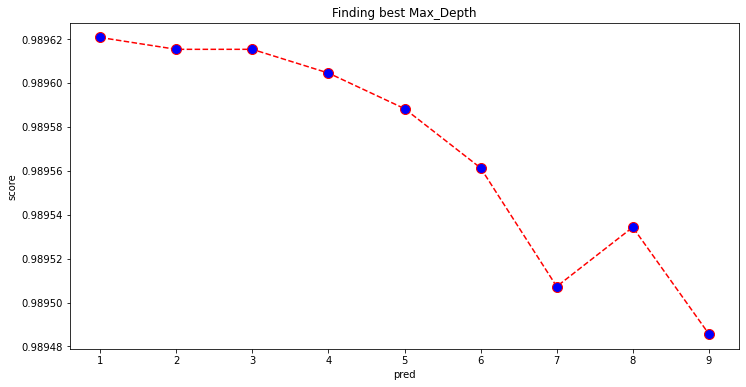

In [112]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Finding best Max_Depth')
plt.xlabel('pred')
plt.ylabel('score')

In [113]:
dtree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 8, random_state = 0)
dtree.fit(X_train,y_train)
dtree_predictions = dtree.predict(X_test)
accuracy = accuracy_score(y_test,dtree_predictions)
print('accuracy before resampling',accuracy)

accuracy before resampling 0.9894262755432669


# dealing with imbalanced dataset

In [114]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority',random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [115]:
accuracy1 = []
for i in range(1,15):
    model1 =  DecisionTreeClassifier(max_depth = i, random_state = 0)
    model1.fit(X_train_res,y_train_res)
    pred1 = model1.predict(X_test)
    score1 = accuracy_score(y_test,pred1)
    accuracy1.append(score1)

Text(0, 0.5, 'score')

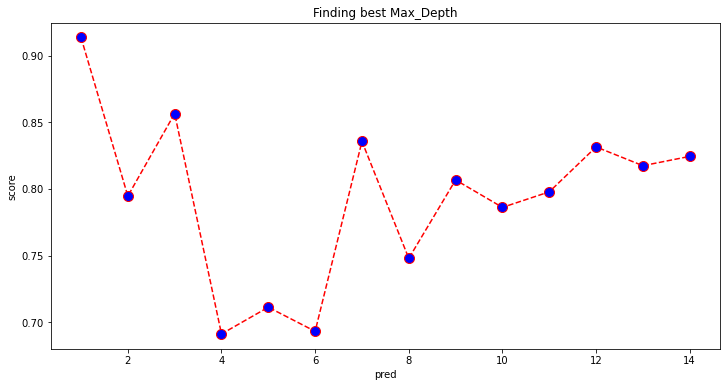

In [116]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), accuracy1, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Finding best Max_Depth')
plt.xlabel('pred')
plt.ylabel('score')

In [117]:
dtree1 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 12, random_state = 0)
dtree1.fit(X_train_res,y_train_res)
dtree_predictions1 = dtree1.predict(X_test)
accuracy_score = accuracy_score(y_test,dtree_predictions1)
print('accuracy after resampling',accuracy_score)

accuracy after resampling 0.8039054737114961


# case-4

# wage rate information for Decision tree

In [118]:
X1 = H1B_visa_wage
y1= H1B_visa['CASE_STATUS_N']

In [119]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2=train_test_split(X1,y1,test_size=0.3,random_state=42)

In [120]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# use the decision trees but before that we will find the maximum depth of the tree

In [121]:
accuracy = []
for i in range(1,10):
    model2 =  DecisionTreeClassifier(max_depth = i, random_state = 0)
    model2.fit(X_train2,y_train2)
    pred2 = model2.predict(X_test2)
    score2 = accuracy_score(y_test2,pred2)
    accuracy.append(score2)

Text(0, 0.5, 'score')

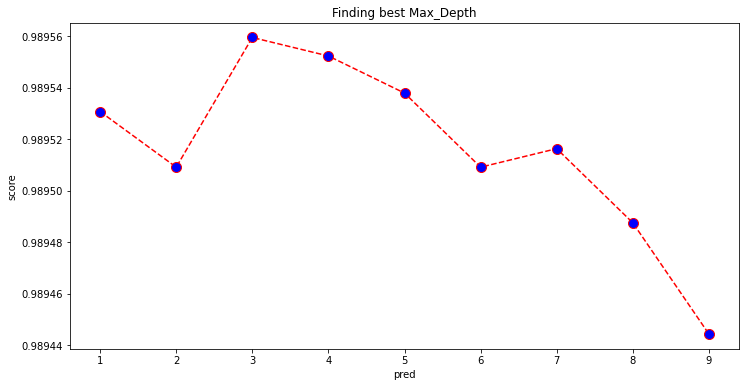

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Finding best Max_Depth')
plt.xlabel('pred')
plt.ylabel('score')

# Training

In [123]:
dtree = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4, random_state = 0)
dtree.fit(X_train2,y_train2)
dtree_predictions = dtree.predict(X_test2)
accuracy = accuracy_score(y_test2,dtree_predictions)
print('accuracy before resampling',accuracy)


accuracy before resampling 0.9895378810789015


# dealing with imbalanced dataset

In [124]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority',random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train2, y_train2)

In [125]:
accuracy1 = []
for i in range(1,15):
    model1 =  DecisionTreeClassifier(max_depth = i, random_state = 0)
    model1.fit(X_train_res,y_train_res)
    pred1 = model1.predict(X_test2)
    score1 = accuracy_score(y_test2,pred1)
    accuracy1.append(score1)

Text(0, 0.5, 'score')

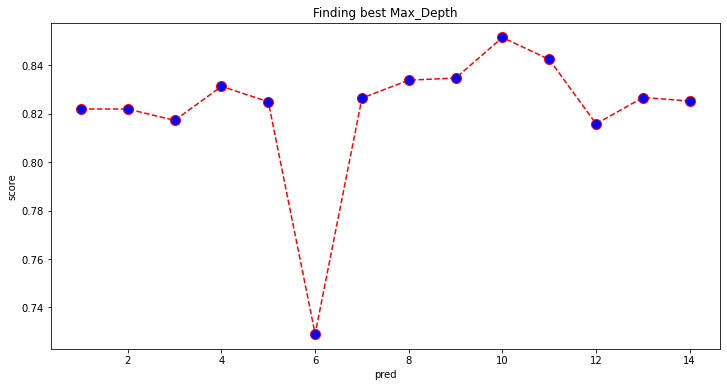

In [126]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), accuracy1, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Finding best Max_Depth')
plt.xlabel('pred')
plt.ylabel('score')

In [127]:
dtree1 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 12, random_state = 0)
dtree1.fit(X_train_res,y_train_res)
dtree_predictions1 = dtree1.predict(X_test2)
accuracy_score = accuracy_score(y_test2,dtree_predictions1)
print('accuracy after resampling',accuracy_score)

accuracy after resampling 0.8526446911766824


In [128]:
filename2 =  'trained_model_H1B_visa_wage_rate.pkl'
pickle.dump(model1 , open(filename2, 'wb'))